This results are for HBM-stack DRAM cache (16 interface of 128-MB) backed-up by DDR4 memory (2 interface of 32-GB).

In [1]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt

import os

datadir = '/scr/babaie/rebasedDCJuly/resAug22/2'


def getStat(filename, stat):
    filename = os.path.join(filename).replace('\\','/')
    #print(stat)
    #print(filename)
    try:
        with open(filename) as f:
            readlines = f.readlines()
            for l in readlines:
                if stat in l:
                    return l
            return 0.0 #for cases where stat was not found
    except: #for cases where the file was not found
        return 0.0



Stats = ['system.generator.numPackets',
         'system.generator.avgReadLatency',
         'system.generator.avgWriteLatency',
         'system.generator.readBW',
         'system.generator.writeBW'
          ]




hit_miss = ['Hit', 'MissClean', 'MissDirty']
link_latency = ['0', '200', '400', '600', '800', '1600', '2000', '2600', '3000', '5000']
rd_perc = ['R67']
inj_rate = ['1', '2', '4', '6', '9', '14']

rows = []

for hm in hit_miss:
    for ll in link_latency:
        for ir in inj_rate:
            for rdPr in rd_perc:
                stats = [hm, ir, rdPr, ll]
                for stat in Stats:
                    time_file_path = '{}/{}_{}_{}_{}/stats.txt'.format(datadir, hm, ll, ir, rdPr)
                    ret_line = getStat(time_file_path,stat)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = -1
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df = pd.DataFrame(rows, columns=[
         'hm',
         'ir',
         'rdPr',
         'll',
         'numPackets',
         'avgReadLatency',
         'avgWriteLatency',
         'readBW',
         'writeBW'
         ])

df['linkLat'] = (df['ll']).astype(int)/2
df['totBW'] = (df['readBW'].astype(float) + df['writeBW'].astype(float))/1000000000
df['ARL'] = (df['avgReadLatency'].astype(float))/1000
df['AWL'] = (df['avgWriteLatency'].astype(float))/1000
df['ART'] = (df['ARL'].astype(float)*0.67 + df['AWL'].astype(float)*0.33)



df.to_csv("/scr/babaie/rebasedDCJuly/resAug22/2/res_1.csv")

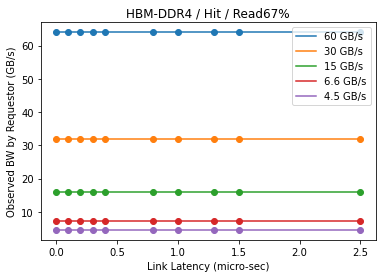

In [2]:
latency = [0, 0.1, 0.2, 0.3, 0.4, 0.8, 1, 1.3, 1.5, 2.5]
df_temp = df.query('(hm==["Hit"]) and (ir==["1"])')[['totBW']]
y1 = df_temp['totBW']
df_temp = df.query('(hm==["Hit"]) and (ir==["2"])')[['totBW']]
y5 = df_temp['totBW']
df_temp = df.query('(hm==["Hit"]) and (ir==["4"])')[['totBW']]
y2 = df_temp['totBW']
df_temp = df.query('(hm==["Hit"]) and (ir==["9"])')[['totBW']]
y3 = df_temp['totBW']
df_temp = df.query('(hm==["Hit"]) and (ir==["14"])')[['totBW']]
y4 = df_temp['totBW']

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.plot(latency, y1, label ="60 GB/s")
plt.scatter(latency, y1)
plt.plot(latency, y5, label ="30 GB/s")
plt.scatter(latency, y5)
plt.plot(latency, y2, label ="15 GB/s")
plt.scatter(latency, y2)
plt.plot(latency, y3, label ="6.6 GB/s")
plt.scatter(latency, y3)
plt.plot(latency, y4, label ="4.5 GB/s")
plt.scatter(latency, y4)

plt.title("HBM-DDR4 / Hit / Read67%")
plt.xlabel("Link Latency (micro-sec)")
plt.ylabel("Observed BW by Requestor (GB/s)")
plt.legend()
plt.show()



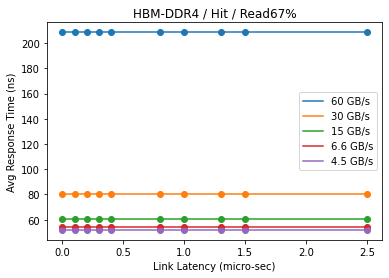

In [3]:
latency = [0, 0.1, 0.2, 0.3, 0.4, 0.8, 1, 1.3, 1.5, 2.5]
df_temp = df.query('(hm==["Hit"]) and (ir==["1"])')[['ART']]
y1 = df_temp['ART']
df_temp = df.query('(hm==["Hit"]) and (ir==["2"])')[['ART']]
y5 = df_temp['ART']
df_temp = df.query('(hm==["Hit"]) and (ir==["4"])')[['ART']]
y2 = df_temp['ART']
df_temp = df.query('(hm==["Hit"]) and (ir==["9"])')[['ART']]
y3 = df_temp['ART']
df_temp = df.query('(hm==["Hit"]) and (ir==["14"])')[['ART']]
y4 = df_temp['ART']

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.plot(latency, y1, label ="60 GB/s")
plt.scatter(latency, y1)
plt.plot(latency, y5, label ="30 GB/s")
plt.scatter(latency, y5)
plt.plot(latency, y2, label ="15 GB/s")
plt.scatter(latency, y2)
plt.plot(latency, y3, label ="6.6 GB/s")
plt.scatter(latency, y3)
plt.plot(latency, y4, label ="4.5 GB/s")
plt.scatter(latency, y4)

plt.title("HBM-DDR4 / Hit / Read67%")
plt.xlabel("Link Latency (micro-sec)")
plt.ylabel("Avg Response Time (ns)")
plt.legend()
plt.show()

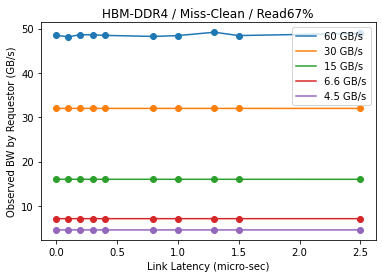

In [4]:
latency = [0, 0.1, 0.2, 0.3, 0.4, 0.8, 1, 1.3, 1.5, 2.5]
df_temp = df.query('(hm==["MissClean"]) and (ir==["1"])')[['totBW']]
y1 = df_temp['totBW']
df_temp = df.query('(hm==["MissClean"]) and (ir==["2"])')[['totBW']]
y5 = df_temp['totBW']
df_temp = df.query('(hm==["MissClean"]) and (ir==["4"])')[['totBW']]
y2 = df_temp['totBW']
df_temp = df.query('(hm==["MissClean"]) and (ir==["9"])')[['totBW']]
y3 = df_temp['totBW']
df_temp = df.query('(hm==["MissClean"]) and (ir==["14"])')[['totBW']]
y4 = df_temp['totBW']

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.plot(latency, y1, label ="60 GB/s")
plt.scatter(latency, y1)
plt.plot(latency, y5, label ="30 GB/s")
plt.scatter(latency, y5)
plt.plot(latency, y2, label ="15 GB/s")
plt.scatter(latency, y2)
plt.plot(latency, y3, label ="6.6 GB/s")
plt.scatter(latency, y3)
plt.plot(latency, y4, label ="4.5 GB/s")
plt.scatter(latency, y4)

plt.title("HBM-DDR4 / Miss-Clean / Read67%")
plt.xlabel("Link Latency (micro-sec)")
plt.ylabel("Observed BW by Requestor (GB/s)")
plt.legend()
plt.show()

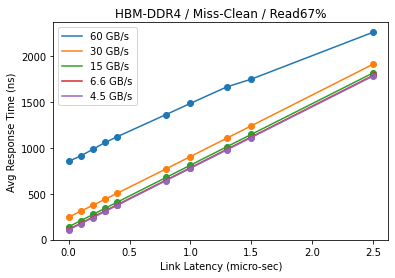

In [5]:
latency = [0, 0.1, 0.2, 0.3, 0.4, 0.8, 1, 1.3, 1.5, 2.5]
df_temp = df.query('(hm==["MissClean"]) and (ir==["1"])')[['ART']]
y1 = df_temp['ART']
df_temp = df.query('(hm==["MissClean"]) and (ir==["2"])')[['ART']]
y5 = df_temp['ART']
df_temp = df.query('(hm==["MissClean"]) and (ir==["4"])')[['ART']]
y2 = df_temp['ART']
df_temp = df.query('(hm==["MissClean"]) and (ir==["9"])')[['ART']]
y3 = df_temp['ART']
df_temp = df.query('(hm==["MissClean"]) and (ir==["14"])')[['ART']]
y4 = df_temp['ART']

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.plot(latency, y1, label ="60 GB/s")
plt.scatter(latency, y1)
plt.plot(latency, y5, label ="30 GB/s")
plt.scatter(latency, y5)
plt.plot(latency, y2, label ="15 GB/s")
plt.scatter(latency, y2)
plt.plot(latency, y3, label ="6.6 GB/s")
plt.scatter(latency, y3)
plt.plot(latency, y4, label ="4.5 GB/s")
plt.scatter(latency, y4)

plt.title("HBM-DDR4 / Miss-Clean / Read67%")
plt.xlabel("Link Latency (micro-sec)")
plt.ylabel("Avg Response Time (ns)")
plt.legend()
plt.show()

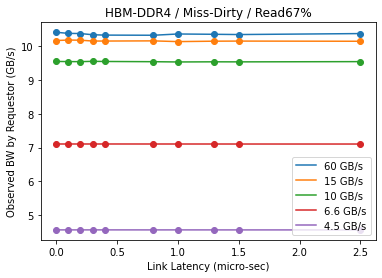

In [6]:
latency = [0, 0.1, 0.2, 0.3, 0.4, 0.8, 1, 1.3, 1.5, 2.5]
df_temp = df.query('(hm==["MissDirty"]) and (ir==["1"])')[['totBW']]
y1 = df_temp['totBW']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["4"])')[['totBW']]
y2 = df_temp['totBW']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["6"])')[['totBW']]
y5 = df_temp['totBW']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["9"])')[['totBW']]
y3 = df_temp['totBW']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["14"])')[['totBW']]
y4 = df_temp['totBW']

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.plot(latency, y1, label ="60 GB/s")
plt.scatter(latency, y1)
plt.plot(latency, y2, label ="15 GB/s")
plt.scatter(latency, y2)

plt.plot(latency, y5, label ="10 GB/s")
plt.scatter(latency, y5)
plt.plot(latency, y3, label ="6.6 GB/s")
plt.scatter(latency, y3)
plt.plot(latency, y4, label ="4.5 GB/s")
plt.scatter(latency, y4)

plt.title("HBM-DDR4 / Miss-Dirty / Read67%")
plt.xlabel("Link Latency (micro-sec)")
plt.ylabel("Observed BW by Requestor (GB/s)")
plt.legend()
plt.show()

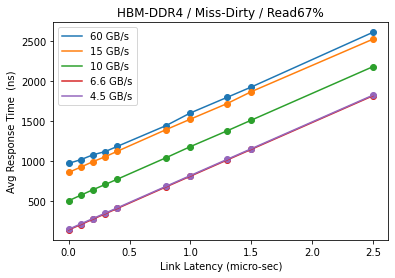

In [7]:
latency = [0, 0.1, 0.2, 0.3, 0.4, 0.8, 1, 1.3, 1.5, 2.5]
df_temp = df.query('(hm==["MissDirty"]) and (ir==["1"])')[['ART']]
y1 = df_temp['ART']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["4"])')[['ART']]
y2 = df_temp['ART']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["6"])')[['ART']]
y5 = df_temp['ART']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["9"])')[['ART']]
y3 = df_temp['ART']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["14"])')[['ART']]
y4 = df_temp['ART']

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.plot(latency, y1, label ="60 GB/s")
plt.scatter(latency, y1)
plt.plot(latency, y2, label ="15 GB/s")
plt.scatter(latency, y2)

plt.plot(latency, y5, label ="10 GB/s")
plt.scatter(latency, y5)
plt.plot(latency, y3, label ="6.6 GB/s")
plt.scatter(latency, y3)
plt.plot(latency, y4, label ="4.5 GB/s")
plt.scatter(latency, y4)

plt.title("HBM-DDR4 / Miss-Dirty / Read67%")
plt.xlabel("Link Latency (micro-sec)")
plt.ylabel("Avg Response Time  (ns)")
plt.legend()
plt.show()